In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph, analysis
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer

/Users/brett/Dropbox/Code/bricolage-dev


In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import numpy as np
import bisect
from IPython.display import Image

In [4]:
def show_network(n, s=True):
    graph.save_network_as_fullgraph(n, name='test', simplify=s)
    return Image(filename='network-test.png', height=500) 

In [5]:
treat = lineage.Treatment("/Users/Brett/Desktop/three/02-(a-and-not-b)-or-(a-and-not-c)-or-(b-and-c-and-not-a)/")

In [27]:
rep = treat.replicates[2]
lin = rep.get_lineage(readonly=True)
targ = lin.targets[0]
flow = [1, .5, .25]

In [28]:
pf, pm, pc = analysis.make_population_frames(lin.population, targ, flow)
pc.describe()

,C1,C2,C3,C4,C5,C6,C7,C8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.475618,0.004655,0.513944,2.694414,1.269704,0.000690,0.030776,5.766960e-02
std,0.297878,0.032336,0.111956,0.472007,0.246128,0.010962,0.126378,8.449259e-02
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.889509e-16
25%,0.542076,0.000000,0.520689,2.418821,1.292775,0.000000,0.000000,8.571898e-03
50%,0.542076,0.000000,0.520689,3.000000,1.350259,0.000000,0.000000,8.571898e-03
75%,0.542076,0.000000,0.520689,3.000000,1.350259,0.000000,0.000000,1.413229e-01
max,2.230080,0.307921,0.848548,3.000000,3.000000,0.204434,1.076068,4.198206e-01


In [29]:
pc.query('C4 == 3.0').head()

,C1,C2,C3,C4,C5,C6,C7,C8
0,0.542076,0,0.520689,3,1.292775,0,0,0.008572
1,0.542076,0,0.520689,3,1.369307,0,0,0.204434
4,0.542076,0,0.520689,3,1.292775,0,0,0.008572
6,0.542076,0,0.520689,3,1.350259,0,0,0.008572
7,0.542076,0,0.520689,3,1.292775,0,0,0.008572


1.0
saving test


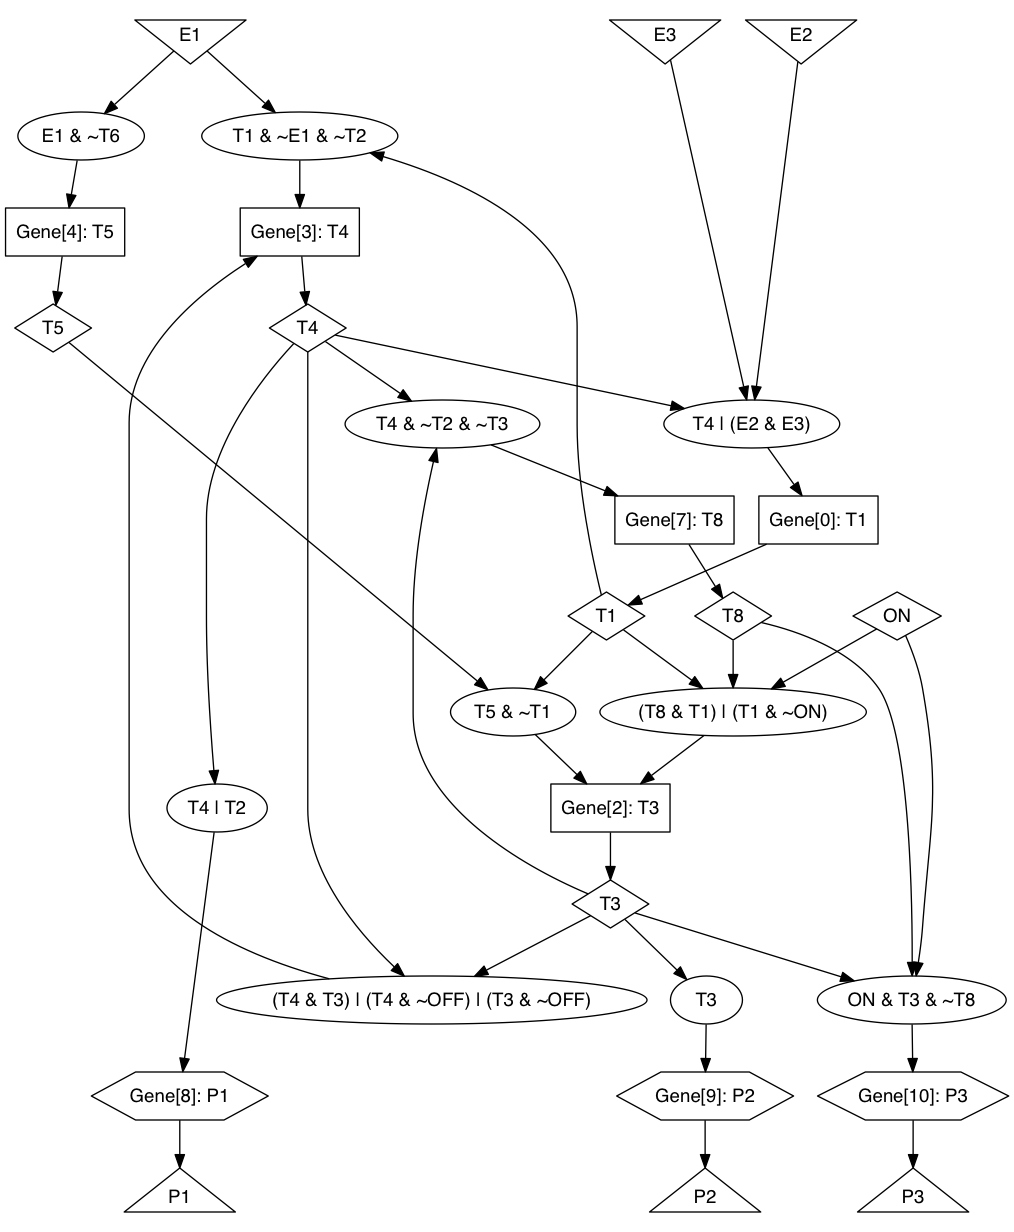

In [30]:
net = lin.population[0]
print net.fitness
show_network(net)

In [31]:
anc = lin.get_ancestry(net.identifier)
ff, mf, cf = analysis.make_ancestry_frames(anc, targ, flow)

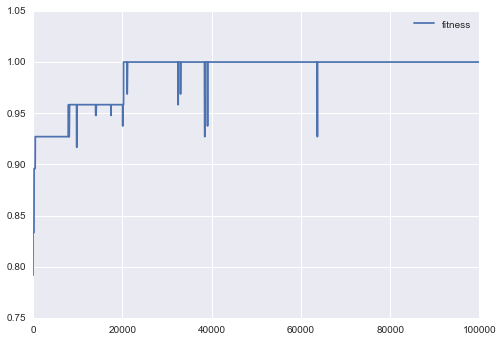

In [32]:
ff.plot()

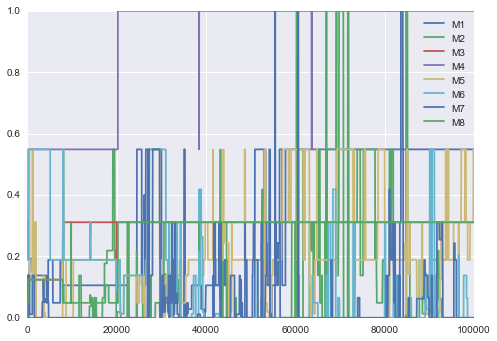

In [33]:
mf.plot()

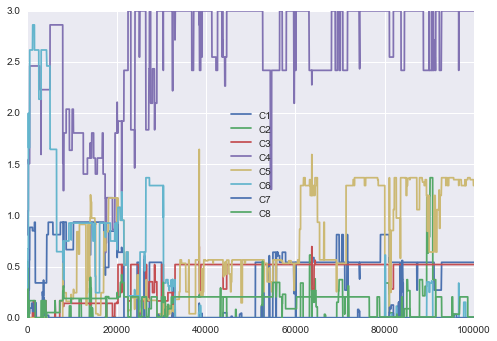

In [34]:
cf.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111312f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113ac2310>], dtype=object)

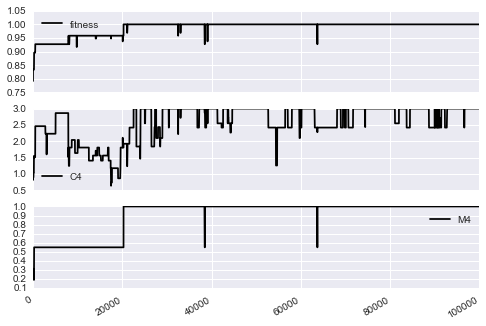

In [35]:
q = pd.concat([ff, cf, mf], axis=1)
q.plot(y=['fitness', 'C4', 'M4'], subplots=True)

1.0
saving test


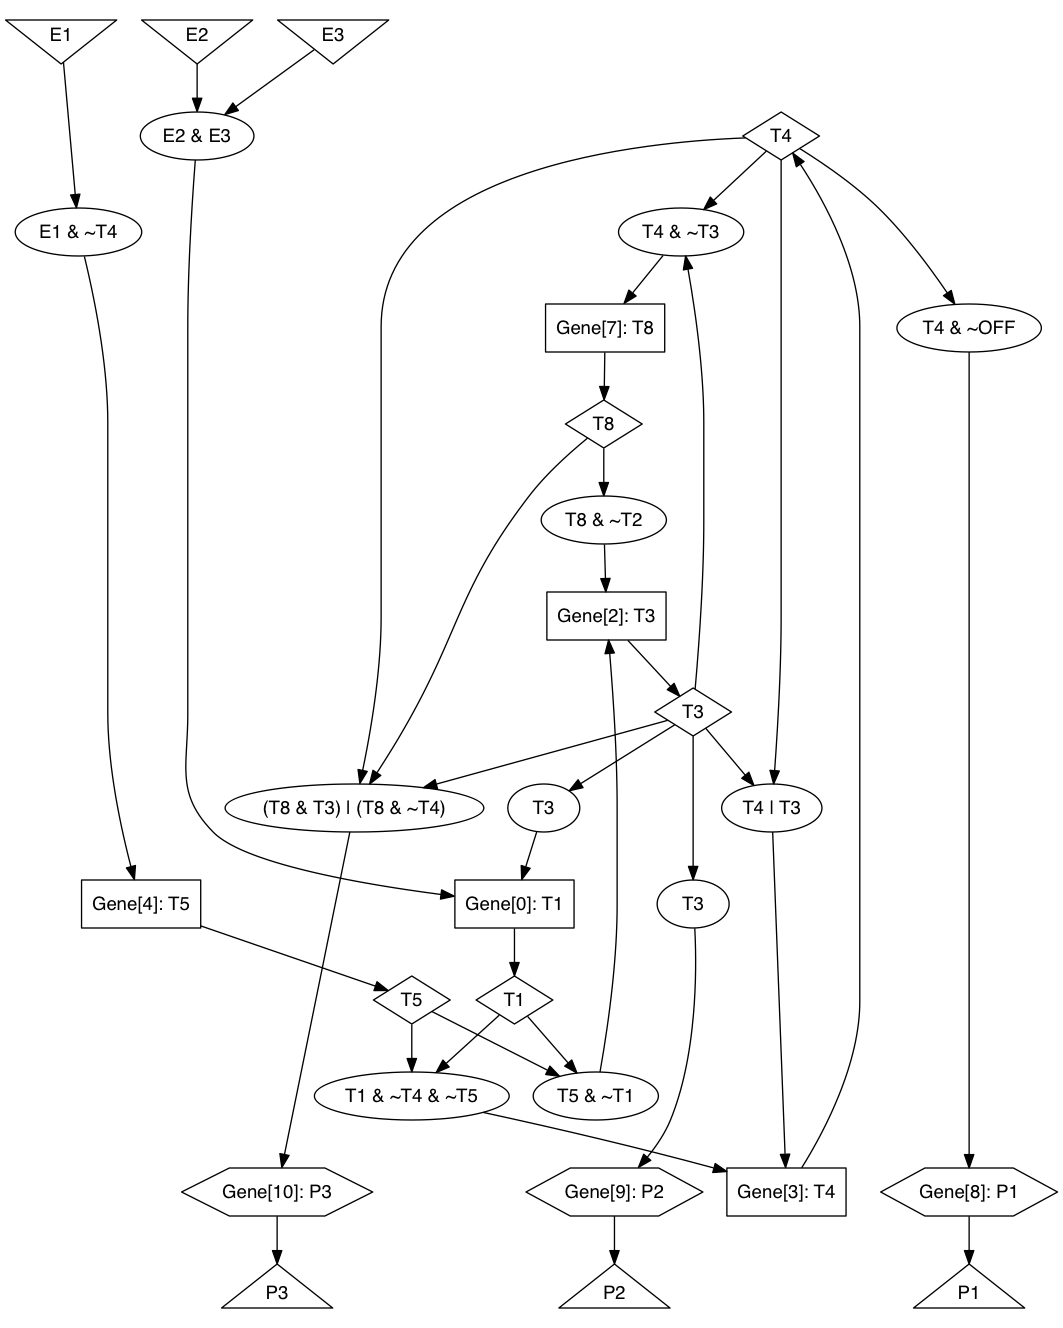

In [36]:
n = anc.network_at_generation(55000)
print n.fitness
show_network(n)

saving test


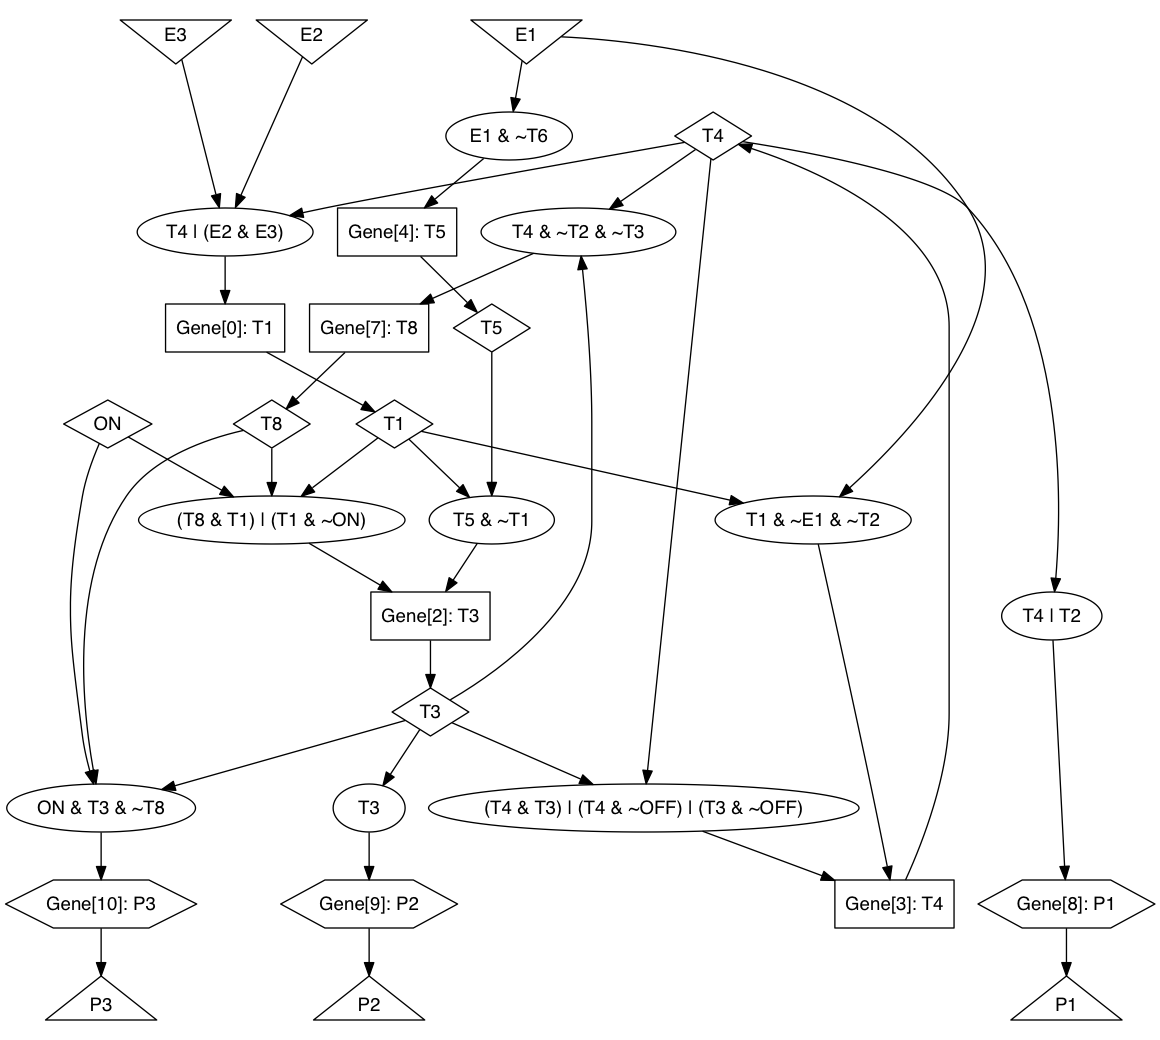

In [37]:
show_network(anc.network_at_generation(100000))